# Lab 1 Evaluation

## SIMON Robin 4IR-C
## MURAT Félix 4IR-C

In the following, we consider the  (binarized) Compas dataset that we studied in the Lab

A decision tree configuration is a set of parameters that one can use to build decision trees. Propose 6 configurations that are likely to provide different topologies and caracteristics

---- 6 configurations ----
---------------------------------

max_depth=10, splitter="best", min_samples_leaf=400

max_depth=10, splitter="best", min_samples_leaf=60

max_depth=20, splitter="best", min_samples_leaf=20

max_depth=10, splitter="random", min_samples_leaf=100

max_depth=20, splitter="random", min_samples_leaf=10

max_depth=20, splitter="random", min_samples_leaf=1

Train a decision tree for each of the previous configurations on the full dataset

In [1]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt # for a good visualization of the trees

import csv
import numpy as np
from utils import load_from_csv

train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")

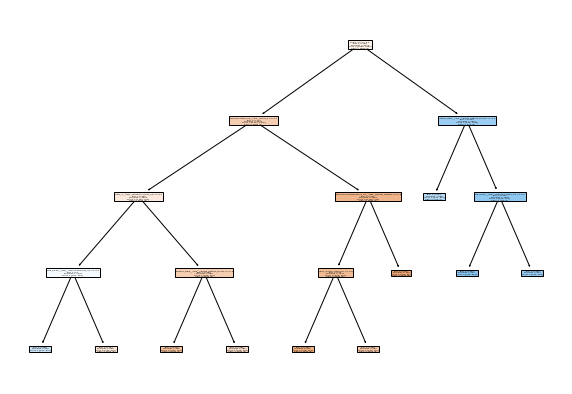

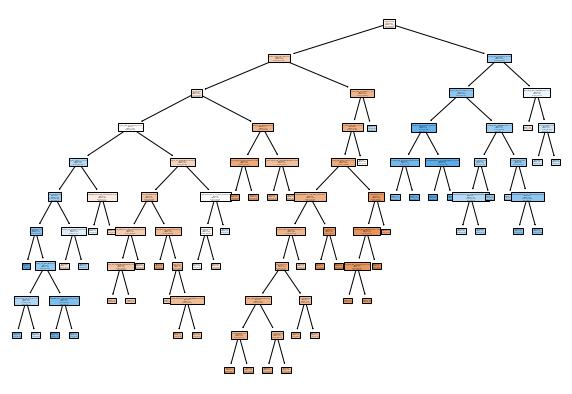

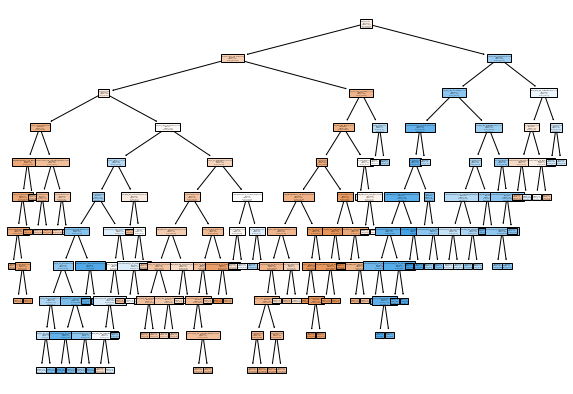

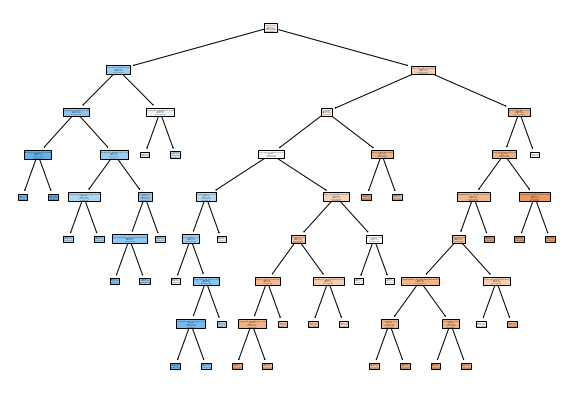

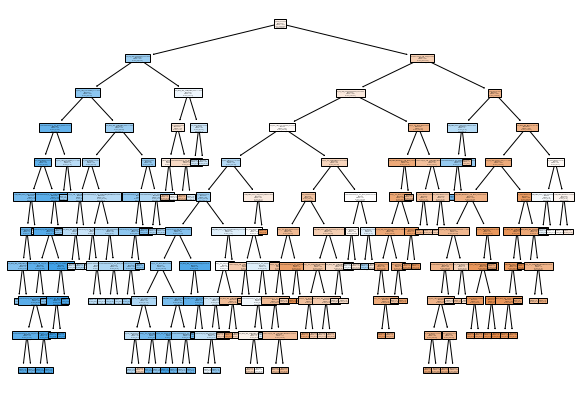

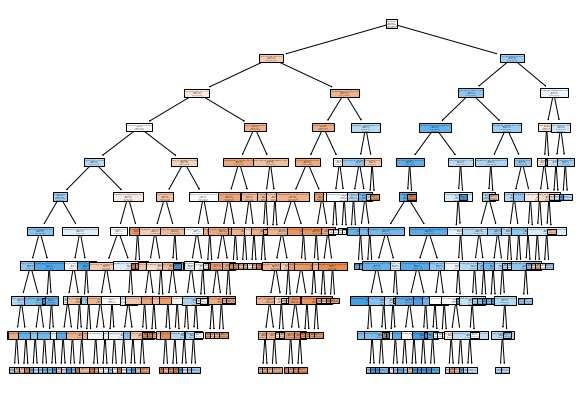

In [2]:
min_samples_list = [400, 60, 20, 100, 10, 1]

for i in range(6):
    
    if i < 3:
        split = "best"
    else:
        split = "random"
        
    samples = min_samples_list[i]
        
    clf = tree.DecisionTreeClassifier(max_depth=10, splitter=split, min_samples_leaf=samples)
    clf = clf.fit(train_examples, train_labels)

    text_representation = tree.export_text(clf)
             
    fig = plt.figure(figsize=(10,7))
    _ = tree.plot_tree(
        clf, 
        feature_names=(features),
        class_names=("false (0)", "true (1)" ), 
        filled=True
    )



## Propose an evaluation in terms of training and testing accuracies using $5$-cross validation on two decision trees that have different typologies

In [3]:
from sklearn.model_selection import KFold

tests = [
    [1000, "best", 20],
    [1000, "random", 20]
]
NB_TESTS = 20

def evaluate(test_list, nb_tests):
    
    train_accuracies = []
    test_accuracies = []

    for j in range(len(test_list)):
        #On effectue un certain nombre de tests et on prend la moyenne des résultats
        somme_test = 0
        somme_train = 0

        for i in range(NB_TESTS):
            kf = KFold(n_splits=5)
            clf = tree.DecisionTreeClassifier(max_depth=test_list[j][0], splitter=test_list[j][1], min_samples_leaf=test_list[j][2])

            n = 0
            for train_index, test_index in kf.split(train_examples):
                X_train_k, X_test_k = train_examples[train_index], train_examples[test_index]
                y_train_k, y_test_k = train_labels[train_index], train_labels[test_index]
                clf = clf.fit(X_train_k, y_train_k)
                #print(clf.score(X_test_k, y_test_k))
                #print(clf.score(X_train_k, y_train_k))
                #print("-------------------------")
                somme_test += clf.score(X_test_k, y_test_k)
                somme_train += clf.score(X_train_k, y_train_k)
                n += 1
        train_accuracy = 100*somme_train/(n*NB_TESTS)
        test_accuracy = 100*somme_test/(n*NB_TESTS)
        print(f"Test n°{j+1}/{len(test_list)} : {train_accuracy} - {test_accuracy}")
        
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        
    return train_accuracies, test_accuracies

evaluate(tests, NB_TESTS)

Test n°1/2 : 68.46198489503838 - 66.56564475660316
Test n°2/2 : 68.46198489503838 - 66.56659352320658


([68.46198489503838, 68.46198489503838],
 [66.56564475660316, 66.56659352320658])

## Propose an experimental study that shows the transition phase from underfitting to overfitting 

Test n°1/40 : 69.6994078695904 - 64.7058238981268
Test n°2/40 : 68.66585388796943 - 66.27162693238125
Test n°3/40 : 68.30551600489592 - 66.62532712213454
Test n°4/40 : 68.15380780413643 - 66.56752430371326
Test n°5/40 : 67.94046351087809 - 66.26495768770735
Test n°6/40 : 67.72568471716434 - 66.28478106423736
Test n°7/40 : 67.42842529409569 - 66.31708948982434
Test n°8/40 : 67.41894100285337 - 66.2394165310215
Test n°9/40 : 67.24351814046308 - 65.51781972535225
Test n°10/40 : 67.07757057840014 - 65.26932920852173
Test n°11/40 : 66.99224005382861 - 65.19826254305416
Test n°12/40 : 66.96853775470558 - 65.25044920276623
Test n°13/40 : 66.70777762455758 - 64.83982481541766
Test n°14/40 : 66.63191228553433 - 65.12418500499113
Test n°15/40 : 66.50864347212944 - 64.89664289504209
Test n°16/40 : 66.55603121241026 - 65.12431090766832
Test n°17/40 : 66.55603121241026 - 65.12431090766832
Test n°18/40 : 66.4943906244539 - 65.14326825363995
Test n°19/40 : 66.4943906244539 - 65.14326825363995
Test n°

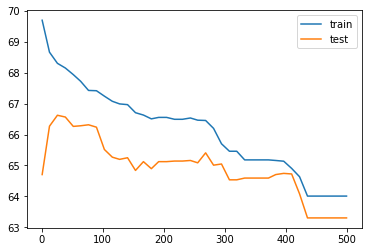

In [4]:
#On trace l'évolution des scores de tests et d'entraînement

tests2 = []

min_samples_list = np.linspace(1, 500, 40).astype(int)

for min_samples in min_samples_list:
    tests2.append([100, "best", min_samples])

train_results, test_results = evaluate(tests2, 5)
xaxis = min_samples_list
plt.plot(xaxis, train_results, label="train")
plt.plot(xaxis, test_results, label="test")
plt.legend()
plt.show()

Le graphe montre l'évolution des score de test et d'entraînement selon le nombre d'échantillons minimum.

Au tout début (entre 0 et 10 échantillons minimum), on peut voir la phase d'overfitting : les tests passent moins de 65% du temps mais l'entraînement donne un score de plus de 69%. Cela s'explique par le fait que si toutes les feuilles sont prises en compte même quand elles sont formées par un très faible nombre d'échantillons, on prend en compte du bruit.

Après 400 échantillons minimum, on ignore trop de feuilles significatives et le modèle devient trop grossier. Ainsi, les deux scores baissent drastiquement (si on continue au delà de 500, les scores vont baisser encore plus).

## Construct the confusion matrix on a particular good configuration (after explaining your choice)

In [5]:
#The best configuration in terms of test accuracy is for min_samples = 20
#We pick the configuration that seems to have the best test results, after the overfitting and before the underfitting.

from sklearn.metrics import confusion_matrix
from sklearn import tree

clf = tree.DecisionTreeClassifier(splitter='best',max_depth=100, min_samples_split=20)
clf = clf.fit(train_examples, train_labels)
x_train, x_test, y_train, y_test = train_test_split(train_examples, train_labels)
y_predicted = clf.predict(x_test)

matrice = confusion_matrix(y_test, y_predicted)

true_pos = 100 * matrice[0][0]/(matrice[0][0] + matrice[0][1])
false_pos = 100 * matrice[0][1]/(matrice[0][0] + matrice[0][1])
true_neg = 100 * matrice[1][1]/(matrice[1][0] + matrice[1][1])
false_neg = 100 * matrice[1][0]/(matrice[1][0] + matrice[1][1])

#print("Matrice de confusion avec des valeurs : ")
#print(matrice)

matrice_confusion = [
    [true_pos, false_pos],
    [false_neg, true_neg]
]
print("Matrice de confusion : ")
print(matrice_confusion)

Matrice de confusion : 
[[73.47242921013412, 26.527570789865873], [38.58024691358025, 61.41975308641975]]


## Provide an evaluation of the fairness of the model based on the False Positive Rate

On obtient autour de 23.5% de faux positifs. Cela signifie que, pour près de 23.5% des personnes, le programme va prédire à tort une récidive. Ce résultat est alarmant et prouve que le modèle est améliorable, mais surtout qu'il n'est pas fiable ni équitable.